In [1]:
# %load /home/sid/libs.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from scipy.io.arff import loadarff
%matplotlib inline

In [2]:
def test_data_prep(*files):
    test_data = [pd.DataFrame(loadarff(file)[0]) for file in files]
    for i in range(len(test_data)):
        test_data[i]['class'].replace([b'0', b'1'], [0, 1], inplace = True)
    return test_data

In [3]:

test_df = test_data_prep('data/1year.arff', 'data/2year.arff', 'data/3year.arff', 'data/4year.arff', 'data/5year.arff')
test_df

[         Attr1     Attr2     Attr3      Attr4     Attr5     Attr6     Attr7  \
 0     0.200550  0.379510  0.396410    2.04720   32.3510  0.388250  0.249760   
 1     0.209120  0.499880  0.472250    1.94470   14.7860  0.000000  0.258340   
 2     0.248660  0.695920  0.267130    1.55480   -1.1523  0.000000  0.309060   
 3     0.081483  0.307340  0.458790    2.49280   51.9520  0.149880  0.092704   
 4     0.187320  0.613230  0.229600    1.40630   -7.3128  0.187320  0.187320   
 5     0.228220  0.497940  0.359690    1.75020  -47.7170  0.000000  0.281390   
 6     0.111090  0.647440  0.289710    1.47050    2.5349  0.000000  0.111090   
 7     0.532320  0.027059  0.705540   53.95400  299.5800  0.000000  0.652400   
 8     0.009020  0.632020  0.053735    1.12630  -37.8420  0.000000  0.014434   
 9     0.124080  0.838370  0.142040    1.16940  -91.8830  0.000000  0.153280   
 10    0.240010  0.443550  0.188350    1.44000  -21.1650 -0.931900  0.240010   
 11   -0.027117  0.111480  0.119890    2

In [4]:
def test_train_splitter(data):
    X_train_2 = []
    X_test_2 = []
    y_train_2 = []
    y_test_2 = []
    for i in range(len(data)):
        X, y = data[i].iloc[:,:-1], data[i]['class']
        X.drop(['Attr37', 'Attr21', 'Attr60', 'Attr45'], axis=1, inplace=True)
        X.fillna(X.median(), inplace=True)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 9)
        X_train_2.append(X_train)
        X_test_2.append(X_test)
        y_train_2.append(y_train)
        y_test_2.append(y_test)
    X_train_fin = pd.concat(X_train_2)
    X_test_fin = pd.concat(X_test_2)
    y_train_fin = pd.concat(y_train_2)
    y_test_fin = pd.concat(y_test_2)
    return X_train_fin, X_test_fin, y_test_fin, y_train_fin
        
X_train, X_test, y_test, y_train = test_train_splitter(test_df)

X_train2 = X_train.reset_index(drop=True)
X_test2 = X_test.reset_index(drop=True)
y_test2 = y_test.reset_index(drop=True)
y_train2 = y_train.reset_index(drop=True)


In [5]:
X_train2.shape, y_train2.shape, X_test2.shape, y_test2.shape

((34722, 60), (34722,), (8683, 60), (8683,))

In [6]:
y_train.value_counts()

0    33072
1     1650
Name: class, dtype: int64

In [7]:
y_test.value_counts()

0    8242
1     441
Name: class, dtype: int64

In [8]:
def get_me_mah_model(X_train, y_train, X_test, y_test, Model):
    model = Model(random_state=9)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print "f1_score", f1_score(y_test, y_pred)
    print "precision_score", precision_score(y_test, y_pred)
    print "recall_score", recall_score(y_test, y_pred)
    print "roc_auc_score", roc_auc_score(y_test, y_pred)
    print "cm matrix", confusion_matrix(y_test, y_pred)
    scores = [n for m, n in model.predict_proba(X_test)]
    fpr, tpr, thresholds = roc_curve(y_test, scores)
    plt.plot(fpr, tpr)
    plt.plot([(0,0), (1,1)])
    len(y_test[y_test == 1])

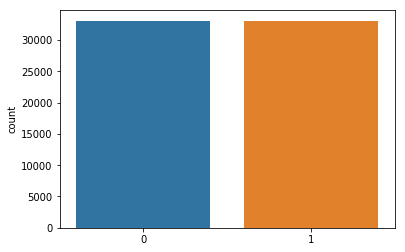

In [9]:
X_train3 = X_train2.dropna()
y_train3 = y_train2.iloc[X_train3.index]
X_test3 = X_test2.dropna()
y_test3 = y_test2.iloc[X_test3.index]
smote = SMOTE(random_state=9, kind = 'borderline2')
X_smote, y_smote = smote.fit_sample(X_train3, y_train3)
sns.countplot(y_smote)
plt.show()

In [10]:
y_train3.value_counts()

0    33072
1     1650
Name: class, dtype: int64

In [11]:
y_test3.value_counts()

0    8242
1     441
Name: class, dtype: int64

f1_score 0.171915524268
precision_score 0.102745792737
recall_score 0.526077097506
roc_auc_score 0.64013148736
cm matrix [[6216 2026]
 [ 209  232]]


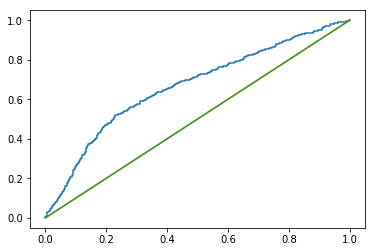

In [12]:
get_me_mah_model(X_smote, y_smote, X_test3, y_test3, LogisticRegression)

In [13]:
from sklearn.ensemble import RandomForestClassifier

f1_score 0.437856328392
precision_score 0.440366972477
recall_score 0.43537414966
roc_auc_score 0.702884842362
cm matrix [[7998  244]
 [ 249  192]]


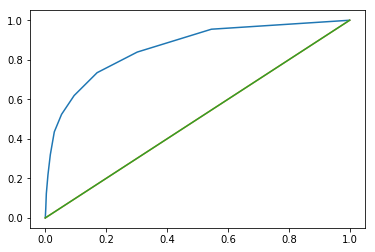

In [14]:
get_me_mah_model(X_smote, y_smote, X_test3, y_test3, RandomForestClassifier)

In [15]:
# RandomForestClassifier(n_estimators=)

f1_score 0.466666666667
precision_score 0.473193473193
recall_score 0.460317460317
roc_auc_score 0.71644846566
cm matrix [[8016  226]
 [ 238  203]]


441

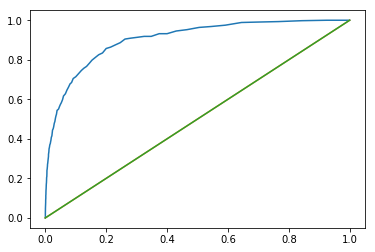

In [16]:
model = RandomForestClassifier(random_state=9, n_estimators=100)
model.fit(X_smote, y_smote)
y_pred = model.predict(X_test3)
print "f1_score", f1_score(y_test3, y_pred)
print "precision_score", precision_score(y_test3, y_pred)
print "recall_score", recall_score(y_test3, y_pred)
print "roc_auc_score", roc_auc_score(y_test3, y_pred)
print "cm matrix", confusion_matrix(y_test3, y_pred)
scores = [n for m, n in model.predict_proba(X_test3)]
fpr, tpr, thresholds = roc_curve(y_test3, scores)
plt.plot(fpr, tpr)
plt.plot([(0,0), (1,1)])
len(y_test3[y_test3 == 1])

In [17]:
model.feature_importances_[np.argsort(model.feature_importances_)]

array([ 0.00689643,  0.00697677,  0.00716682,  0.00738761,  0.0076361 ,
        0.00769469,  0.00772361,  0.00785088,  0.00800767,  0.00812895,
        0.00821755,  0.00840618,  0.00849871,  0.00897043,  0.00899404,
        0.00922078,  0.00927144,  0.00953977,  0.00958179,  0.00976287,
        0.00999672,  0.01100915,  0.01101994,  0.01144813,  0.01156936,
        0.01177353,  0.01189484,  0.01193445,  0.01234958,  0.01248176,
        0.01265902,  0.01392878,  0.01408213,  0.01422414,  0.01475483,
        0.01481977,  0.01488835,  0.01530408,  0.01580534,  0.01589511,
        0.01590779,  0.01782783,  0.018494  ,  0.0186949 ,  0.01882197,
        0.01891943,  0.01960545,  0.0205485 ,  0.02101213,  0.02145789,
        0.02297893,  0.02487031,  0.03031738,  0.03095145,  0.03165391,
        0.03946129,  0.04364724,  0.04939144,  0.05203337,  0.0556327 ])

In [18]:
features_imp = pd.Series(data=model.feature_importances_, index=X_test3.columns)

In [19]:
sorted_features = features_imp.sort_values(ascending=False)
sorted_features

Attr27    0.055633
Attr15    0.052033
Attr41    0.049391
Attr6     0.043647
Attr13    0.039461
Attr34    0.031654
Attr24    0.030951
Attr39    0.030317
Attr26    0.024870
Attr16    0.022979
Attr22    0.021458
Attr58    0.021012
Attr42    0.020548
Attr46    0.019605
Attr38    0.018919
Attr5     0.018822
Attr25    0.018695
Attr51    0.018494
Attr10    0.017828
Attr29    0.015908
Attr55    0.015895
Attr2     0.015805
Attr61    0.015304
Attr59    0.014888
Attr35    0.014820
Attr23    0.014755
Attr9     0.014224
Attr14    0.014082
Attr1     0.013929
Attr31    0.012659
Attr12    0.012482
Attr17    0.012350
Attr56    0.011934
Attr19    0.011895
Attr18    0.011774
Attr64    0.011569
Attr8     0.011448
Attr33    0.011020
Attr36    0.011009
Attr32    0.009997
Attr44    0.009763
Attr47    0.009582
Attr3     0.009540
Attr62    0.009271
Attr20    0.009221
Attr57    0.008994
Attr30    0.008970
Attr40    0.008499
Attr54    0.008406
Attr4     0.008218
Attr63    0.008129
Attr49    0.008008
Attr48    0.

In [20]:
sorted_features.index

Index([u'Attr27', u'Attr15', u'Attr41', u'Attr6', u'Attr13', u'Attr34',
       u'Attr24', u'Attr39', u'Attr26', u'Attr16', u'Attr22', u'Attr58',
       u'Attr42', u'Attr46', u'Attr38', u'Attr5', u'Attr25', u'Attr51',
       u'Attr10', u'Attr29', u'Attr55', u'Attr2', u'Attr61', u'Attr59',
       u'Attr35', u'Attr23', u'Attr9', u'Attr14', u'Attr1', u'Attr31',
       u'Attr12', u'Attr17', u'Attr56', u'Attr19', u'Attr18', u'Attr64',
       u'Attr8', u'Attr33', u'Attr36', u'Attr32', u'Attr44', u'Attr47',
       u'Attr3', u'Attr62', u'Attr20', u'Attr57', u'Attr30', u'Attr40',
       u'Attr54', u'Attr4', u'Attr63', u'Attr49', u'Attr48', u'Attr50',
       u'Attr28', u'Attr11', u'Attr53', u'Attr52', u'Attr43', u'Attr7'],
      dtype='object')

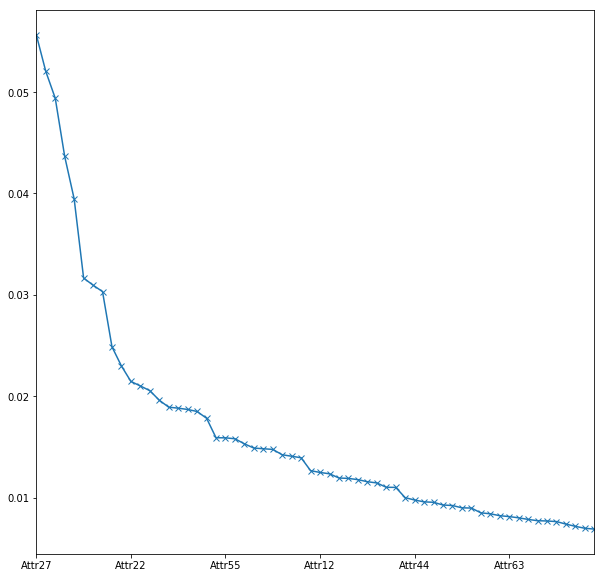

In [21]:
plt.figure(figsize=(10,10))
sorted_features.plot(marker='x')
# plt.xticks(features_imp.index)

In [22]:
len(sorted_features.index)

60

In [23]:
# significance covered by sorted features
sorted_features[sorted_features > 0.01].sum()

0.8240702112617728

In [24]:
selected_features = sorted_features[sorted_features > 0.01]

In [25]:
selected_features.shape

(39,)

In [26]:
X_smote2 = pd.DataFrame(data=X_smote, columns=X_train3.columns)[selected_features.index].copy()
X_test4 = X_test3[selected_features.index].copy()


f1_score 0.491803278689
precision_score 0.474683544304
recall_score 0.510204081633
roc_auc_score 0.739996483913
cm matrix [[7993  249]
 [ 216  225]]


(441, 474)

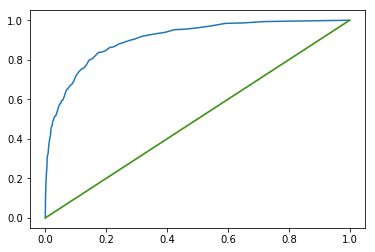

In [27]:
model = RandomForestClassifier(random_state=9, n_estimators=100)
model.fit(X_smote2, y_smote)
y_pred = model.predict(X_test4)
print "f1_score", f1_score(y_test3, y_pred)
print "precision_score", precision_score(y_test3, y_pred)
print "recall_score", recall_score(y_test3, y_pred)
print "roc_auc_score", roc_auc_score(y_test3, y_pred)
print "cm matrix", confusion_matrix(y_test3, y_pred)
scores = [n for m, n in model.predict_proba(X_test4)]
fpr, tpr, thresholds = roc_curve(y_test3, scores)
plt.plot(fpr, tpr)
plt.plot([(0,0), (1,1)])
len(y_test3[y_test3 == 1]), len(y_pred[y_pred == 1])

In [28]:
X_smote3 = X_smote2.copy()
for col in X_smote2.columns:
    X_smote3[col] = np.log(X_smote2[col] + 1 - min(X_smote2[col]))

In [29]:
X_test5 = X_test4.copy()
for col in X_test4.columns:
    X_test5[col] = np.log(X_test4[col] + 1 - min(X_test4[col]))

In [30]:
X_smote2.shape

(66143, 39)

f1_score 0.105824133993
precision_score 0.0635864592864
recall_score 0.315192743764
roc_auc_score 0.533415347859
cm matrix [[6195 2047]
 [ 302  139]]


(441, 2186)

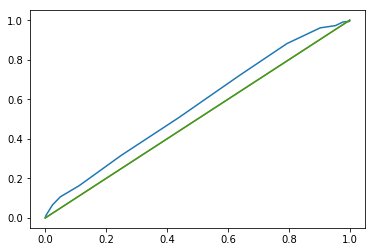

In [31]:
model = RandomForestClassifier(random_state=9, n_estimators=100)
model.fit(X_smote3, y_smote)
y_pred = model.predict(X_test5)
print "f1_score", f1_score(y_test3, y_pred)
print "precision_score", precision_score(y_test3, y_pred)
print "recall_score", recall_score(y_test3, y_pred)
print "roc_auc_score", roc_auc_score(y_test3, y_pred)
print "cm matrix", confusion_matrix(y_test3, y_pred)
scores = [n for m, n in model.predict_proba(X_test5)]
fpr, tpr, thresholds = roc_curve(y_test3, scores)
plt.plot(fpr, tpr)
plt.plot([(0,0), (1,1)])
len(y_test3[y_test3 == 1]), len(y_pred[y_pred == 1])

In [32]:
X_

NameError: name 'X_' is not defined